The following Notebook fits a RNN to recognize characters which are hand written in Hindi.

    Import the necessary modules:

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Reshape, Flatten
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

    Set constants and paths that we might use:

In [2]:
TRAIN_DATA_DIR = '../Hindi-OCR/datasets/DevanagariHandwrittenCharacterDataset/Train/'
VALIDATION_DATA_DIR = '../Hindi-OCR/datasets/DevanagariHandwrittenCharacterDataset/Test/'
IMAGE_SIZE = (32, 32)
BATCH_SIZE = 128
NUM_CLASSES = 46

    Load the images using ImageDataGenerator:

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

    Let's preprocess the images and perform aug..:

In [4]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


    Let's define the RNN architecture:

In [20]:

model = Sequential()
model.add(Reshape((32, 32), input_shape=(32, 32, 1)))
model.add(SimpleRNN(128, activation='relu'))
model.add(Flatten())
model.add(Dense(NUM_CLASSES, activation='softmax'))

    Congiure the RNN:

In [21]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 32, 32)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 128)               20608     
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 46)                5934      
                                                                 
Total params: 26542 (103.68 KB)
Trainable params: 26542 (103.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


    Fit the RNN:

In [22]:
history = model.fit(
    train_generator,  
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
611/611 [==============================] - 21s 33ms/step - loss: 2.1159 - accuracy: 0.4154 - val_loss: 1.3948 - val_accuracy: 0.5974
Epoch 2/30
611/611 [==============================] - 20s 33ms/step - loss: 1.2112 - accuracy: 0.6487 - val_loss: 1.0392 - val_accuracy: 0.7037
Epoch 3/30
611/611 [==============================] - 20s 33ms/step - loss: 0.9290 - accuracy: 0.7287 - val_loss: 0.8301 - val_accuracy: 0.7602
Epoch 4/30
611/611 [==============================] - 21s 34ms/step - loss: 0.7749 - accuracy: 0.7714 - val_loss: 0.8407 - val_accuracy: 0.7609
Epoch 5/30
611/611 [==============================] - 20s 32ms/step - loss: 0.6912 - accuracy: 0.7939 - val_loss: 0.6471 - val_accuracy: 0.8113
Epoch 6/30
611/611 [==============================] - 20s 33ms/step - loss: 0.6270 - accuracy: 0.8127 - val_loss: 0.6320 - val_accuracy: 0.8155
Epoch 7/30
611/611 [==============================] - 20s 32ms/step - loss: 0.5766 - accuracy: 0.8287 - val_loss: 0.5573 - val_accuracy:

    Let's Visualize the RNN's performance:

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

    Training Vs Validation Accuracy:

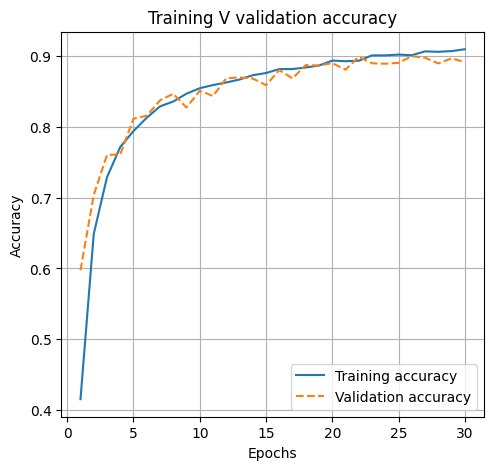

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val_acc, '--', label='Validation accuracy')
plt.title('Training V validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()


    Training Vs Validation Loss:

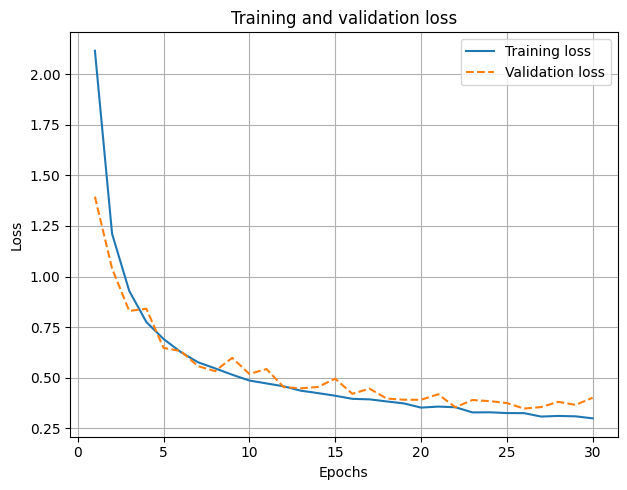

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()